##Data anlysis using EDA

### Data loading

Load the dataset "pirvision_office_dataset1.csv" into a pandas DataFrame. Pandas Library help us to read this file which is in CSV format.

**Reasoning**:
First step is that we will load tha dataset using the pandas library for visualization and for further working on this dataset. Here we have imported pandas library and dislpayed the first few rows of the dataset.




In [ ]:
import pandas as pd

try:
    df = pd.read_csv('pirvision_office_dataset1.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'pirvision_office_dataset1.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
0,2024-08-08,19:19:56,0,86,10269,10721,11156,11170,10931,10671,...,11178,11197,11161,11096,10957,10839,10735,10590,10411,10329
1,2024-08-08,19:20:12,1,86,10364,10907,11299,11238,10867,10535,...,11122,11145,11136,11108,11041,10824,10645,10493,10398,10357
2,2024-08-08,19:20:28,0,86,10329,10793,11197,11242,11052,10658,...,11168,11204,11162,11109,11007,10867,10700,10533,10427,10265
3,2024-08-08,19:20:44,0,86,10169,10425,10822,11133,11136,10834,...,11116,11273,11186,10984,10910,10807,10714,10651,10562,10463
4,2024-08-08,19:21:00,0,86,10320,10667,11104,11234,11129,10814,...,11006,11257,11370,11173,10924,10816,10754,10588,10428,10407


(7651, 59)


### Data exploration

Explore the loaded dataset to understand its characteristics and identify potential issues.In this step we will see about the variables names and their datatype. This will help us realize that what are the outliers and variables.


In [ ]:
import matplotlib.pyplot as plt

# Examine data types and summary statistics
print("\nInfo: ","\n")
print(df.info())
print("\n Describe: ","\n")
print(df.describe())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")

# Document observations (replace with actual observations)
print("Observations:")
print("1. Data shape:", df.shape)
print("2. missing values: 0")  # Add observations on data types and missing values
print("3. Duplicate rows:", len(duplicate_rows))


Info:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7651 entries, 0 to 7650
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7651 non-null   object
 1   Time           7651 non-null   object
 2   Label          7651 non-null   int64 
 3   Temperature_F  7651 non-null   int64 
 4   PIR_1          7651 non-null   int64 
 5   PIR_2          7651 non-null   int64 
 6   PIR_3          7651 non-null   int64 
 7   PIR_4          7651 non-null   int64 
 8   PIR_5          7651 non-null   int64 
 9   PIR_6          7651 non-null   int64 
 10  PIR_7          7651 non-null   int64 
 11  PIR_8          7651 non-null   int64 
 12  PIR_9          7651 non-null   int64 
 13  PIR_10         7651 non-null   int64 
 14  PIR_11         7651 non-null   int64 
 15  PIR_12         7651 non-null   int64 
 16  PIR_13         7651 non-null   int64 
 17  PIR_14         7651 non-null   int64 
 18  PIR_15         765

**HistoGrams**

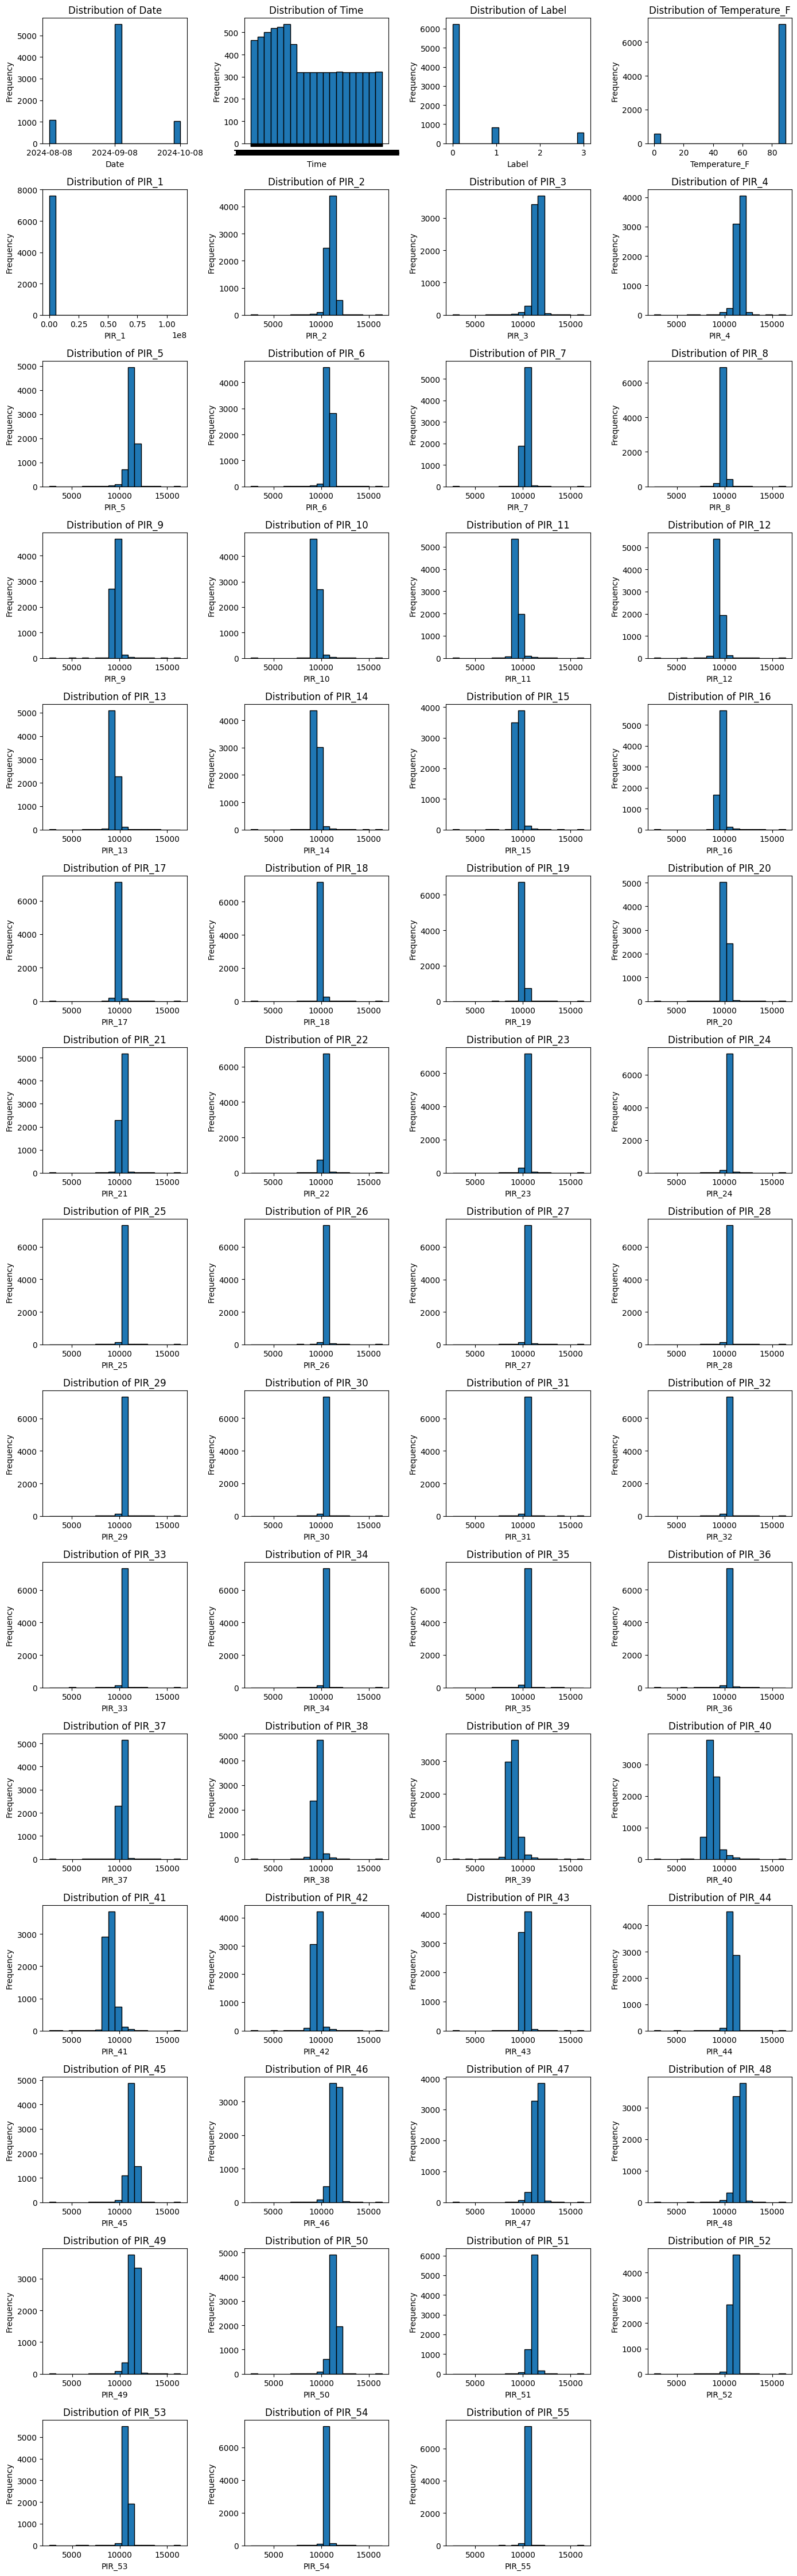

In [ ]:
# Get the list of all columns
all_columns = df.columns

# Calculate the number of rows and columns for the grid
n_cols = 4  # You can adjust the number of columns
n_rows = (len(all_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot histograms for each column
for i, col in enumerate(all_columns):
    axes[i].hist(df[col].dropna(), bins=20, edgecolor='black')  # Drop NaN values for plotting
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Data cleaning

Clean the data by handling missing values, removing duplicates rows and variables, and addressing outliers.


**Reasoning**:
Handle missing values, remove duplicates, and address outliers as per the instructions.  This involves checking for missing values, imputing or removing columns with missing values, removing duplicate rows, identifying and handling outliers in numerical features, and documenting all decisions.



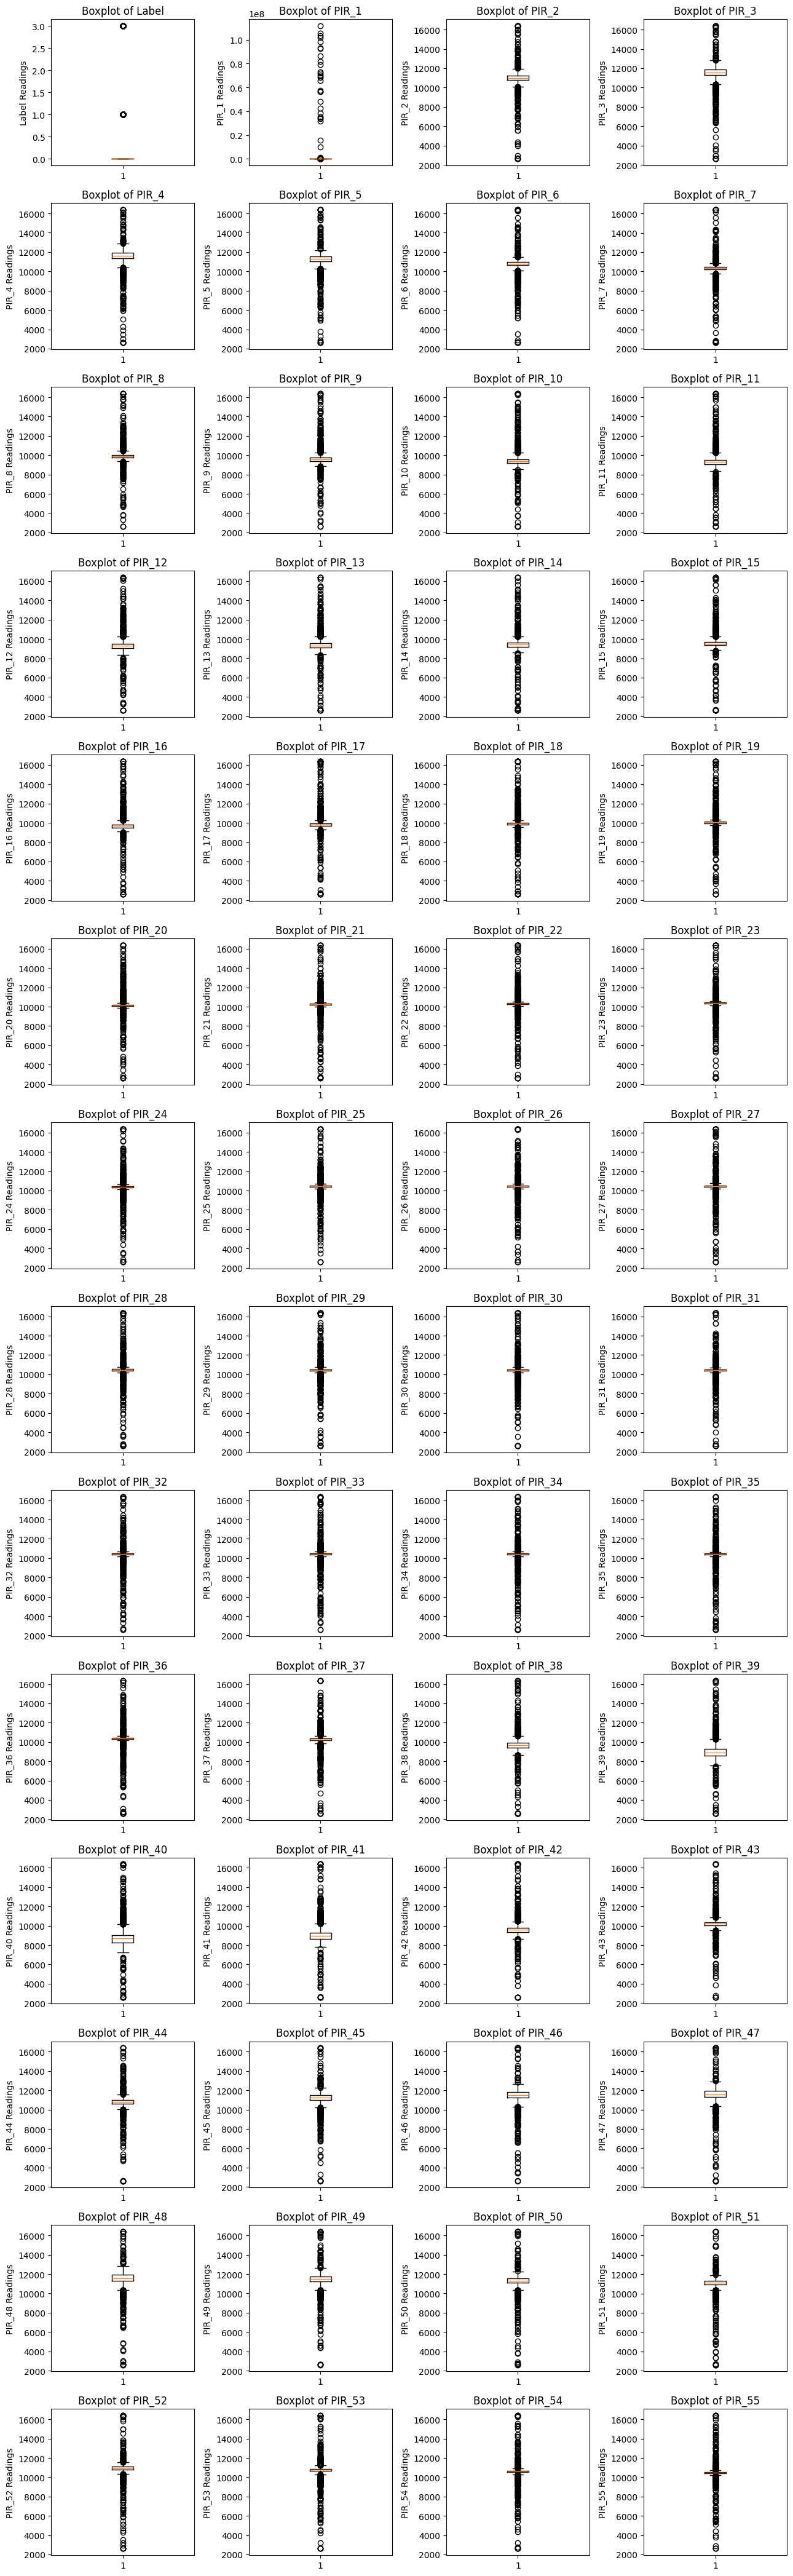

In [ ]:
import matplotlib.pyplot as plt

# Identify columns to plot
columns_to_plot = ['Label'] + [col for col in df.columns if 'PIR' in col]

# Create a grid of box plots with 4 plots per row
n_cols = len(columns_to_plot)
n_rows = (n_cols + 3) // 4  # Calculate rows needed for 4 plots per row
fig, axes = plt.subplots(n_rows, 4, figsize=(13, 3 * n_rows))  # Adjust figure size
axes = axes.flatten() if n_cols > 1 else [axes]

# Generate box plots
for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(df[col])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(f"{col} Readings")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Removing Outliers**

## Outlier Remove


In [ ]:
df_clean = df.copy()
numerical_cols = [col for col in df_clean.select_dtypes(include='number').columns if col != 'Label']

# Create mask of rows to keep
mask = pd.Series(True, index=df_clean.index)

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask &= df_clean[col].between(lower, upper)

df_clean = df_clean[mask]


In [ ]:
df_clean.to_csv("pirvision_office_dataset_clean.csv", index=False)


### Data visualization

Visualize the data to understand the distribution of individual variables and relationships between them.


**Reasoning**:
Create histograms, box plots, scatter plots, and bar charts to visualize the data and explore relationships between variables.



## Box Plots After removing outliers

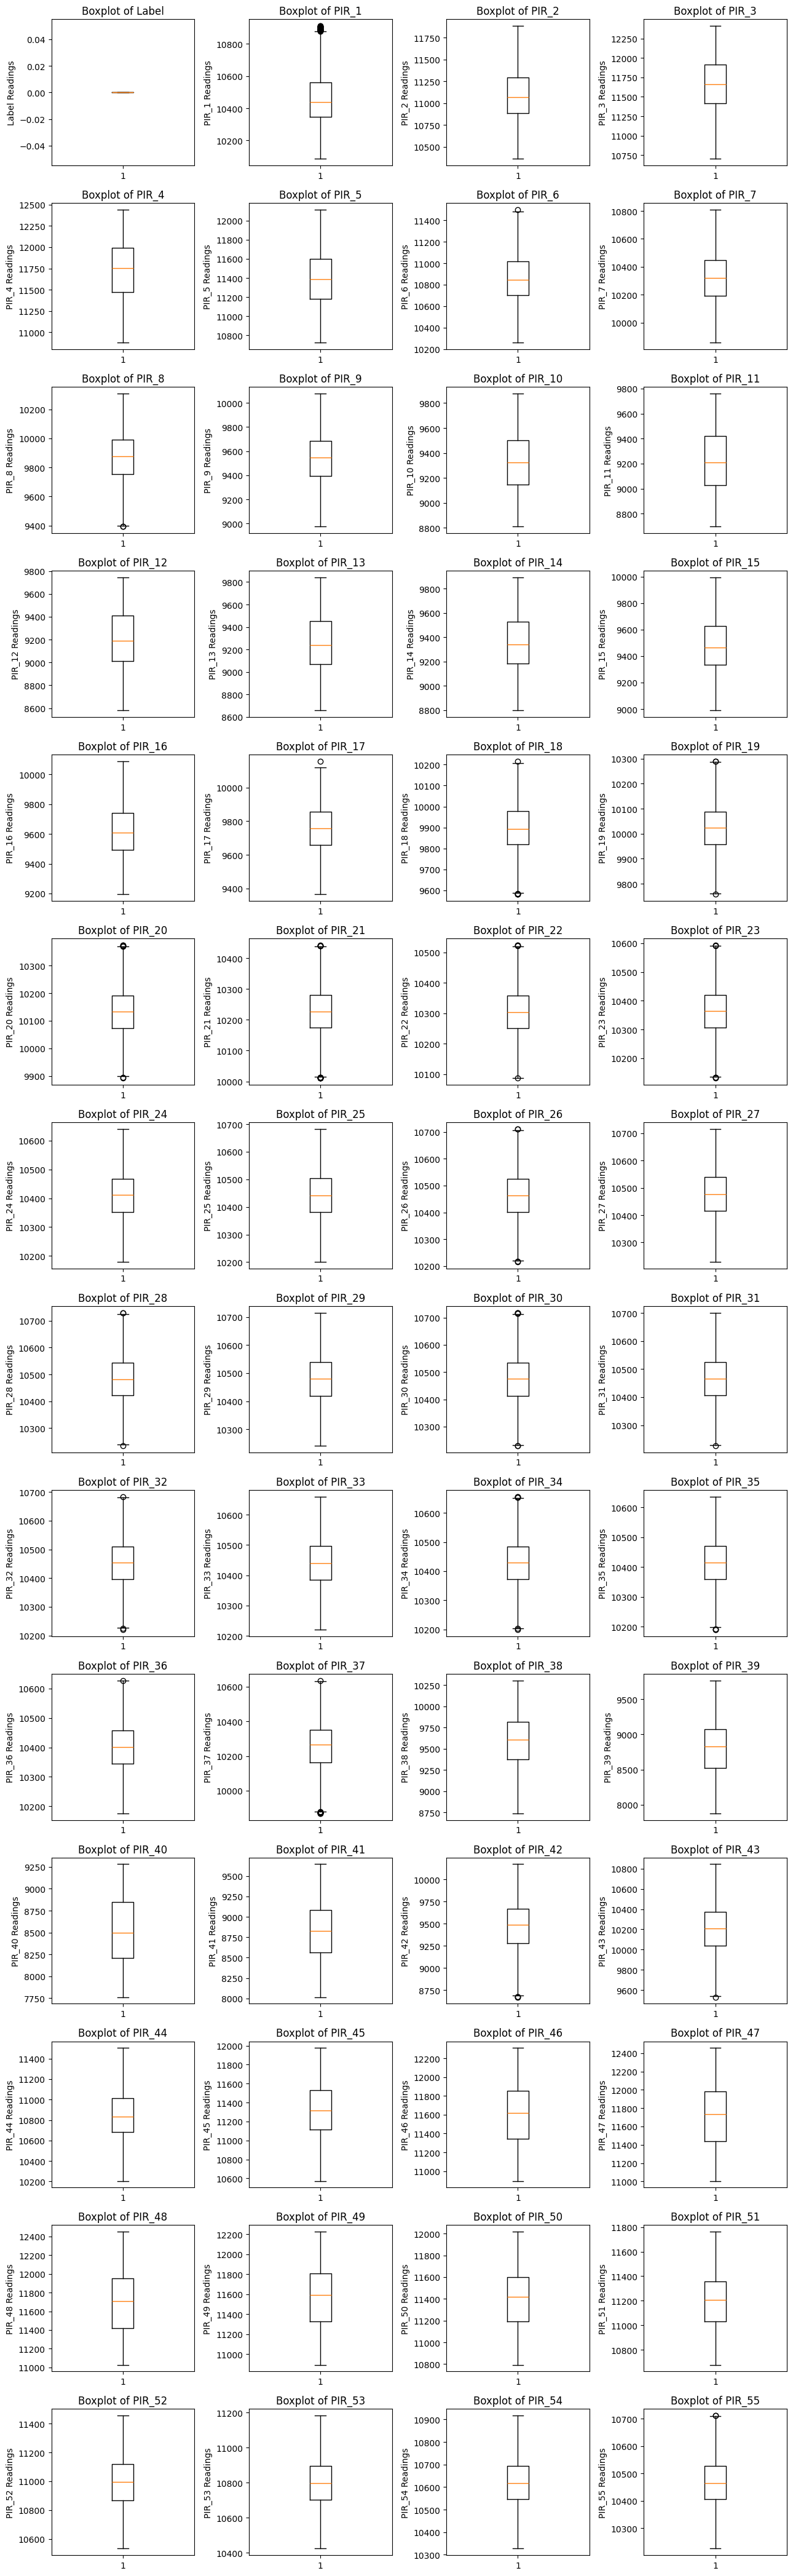

In [ ]:
import matplotlib.pyplot as plt

# Identify columns to plot
columns_to_plot = ['Label'] + [col for col in df.columns if 'PIR' in col]

# Create a grid of box plots with 4 plots per row
n_cols = len(columns_to_plot)
n_rows = (n_cols + 3) // 4  # Calculate rows needed for 4 plots per row
fig, axes = plt.subplots(n_rows, 4, figsize=(13, 3 * n_rows))  # Adjust figure size
axes = axes.flatten() if n_cols > 1 else [axes]

# Generate box plots
for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(df[col])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(f"{col} Readings")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Scatter Plot**

### Data preparation
Prepare the data for correlation analysis .


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Feature Scaling (MinMaxScaler for PIR and Temperature)
scaler = MinMaxScaler()
pir_columns = [col for col in df.columns if 'PIR' in col]
numerical_cols = ['Temperature_F'] + pir_columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Encoding Categorical Variables (Label Encoding for 'Label')
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Time Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# Combine Date and Time for time series analysis
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df = df.set_index('DateTime')

# Data Subsetting (Optional) - Not applied in this step.
# Document the process
print("Data Preparation Steps:")
print("- Feature Scaling: MinMaxScaler applied to 'Temperature_F' and all PIR columns.")
print("- Encoding: Label Encoding applied to 'Label' column.")
print("- Time Feature Engineering: 'DayOfWeek' and 'Month' created from 'Date', 'DateTime' created by combining 'Date' and 'Time' and set as index.")
print("- Data Subsetting: No subsetting applied in this step.")
display(df.head())

Data Preparation Steps:
- Feature Scaling: MinMaxScaler applied to 'Temperature_F' and all PIR columns.
- Encoding: Label Encoding applied to 'Label' column.
- Time Feature Engineering: 'DayOfWeek' and 'Month' created from 'Date', 'DateTime' created by combining 'Date' and 'Time' and set as index.
- Data Subsetting: No subsetting applied in this step.


,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55,DayOfWeek,Month
DateTime,,,,,,,,,,,,,,,,,,,,,
2024-08-08 19:19:56,2024-08-08,19:19:56,0,0.25,0.300111,0.283159,0.365152,0.335052,0.277879,0.368702,...,0.289735,0.302412,0.278610,0.291635,0.313987,0.307602,0.212894,0.264325,3,8
2024-08-08 19:20:12,2024-08-08,19:20:12,1,0.25,0.405316,0.397903,0.437374,0.370103,0.238879,0.264885,...,0.275938,0.309833,0.335831,0.280123,0.228354,0.194152,0.193403,0.316081,3,8
2024-08-08 19:20:28,2024-08-08,19:20:28,0,0.25,0.366556,0.327576,0.385859,0.372165,0.351615,0.358779,...,0.290287,0.310451,0.312670,0.313124,0.280685,0.240936,0.236882,0.146026,3,8
2024-08-08 19:20:44,2024-08-08,19:20:44,0,0.25,0.189369,0.100555,0.196465,0.315979,0.402803,0.493130,...,0.303532,0.233148,0.246594,0.267076,0.294006,0.378947,0.439280,0.512015,3,8
2024-08-08 19:21:00,2024-08-08,19:21:00,0,0.25,0.356589,0.249846,0.338889,0.368041,0.398537,0.477863,...,0.405077,0.350031,0.256131,0.273983,0.332065,0.305263,0.238381,0.408503,3,8


## Data analysis

Calculate and visualize the correlation matrix of the prepared dataset. Identify and document significant correlations.


**Reasoning**:
The error indicates that the correlation function cannot handle string values like time.  I need to exclude non-numeric columns before calculating the correlation.



corelation analysis

CORRELATION ANALYSIS
Dataset loaded successfully!
Shape: (5451, 59)
Columns: ['Date', 'Time', 'Label', 'Temperature_F', 'PIR_1', 'PIR_2', 'PIR_3', 'PIR_4', 'PIR_5', 'PIR_6', 'PIR_7', 'PIR_8', 'PIR_9', 'PIR_10', 'PIR_11', 'PIR_12', 'PIR_13', 'PIR_14', 'PIR_15', 'PIR_16', 'PIR_17', 'PIR_18', 'PIR_19', 'PIR_20', 'PIR_21', 'PIR_22', 'PIR_23', 'PIR_24', 'PIR_25', 'PIR_26', 'PIR_27', 'PIR_28', 'PIR_29', 'PIR_30', 'PIR_31', 'PIR_32', 'PIR_33', 'PIR_34', 'PIR_35', 'PIR_36', 'PIR_37', 'PIR_38', 'PIR_39', 'PIR_40', 'PIR_41', 'PIR_42', 'PIR_43', 'PIR_44', 'PIR_45', 'PIR_46', 'PIR_47', 'PIR_48', 'PIR_49', 'PIR_50', 'PIR_51', 'PIR_52', 'PIR_53', 'PIR_54', 'PIR_55']

First few rows:
         Date      Time  Label  Temperature_F  PIR_1  PIR_2  PIR_3  PIR_4  \
0  2024-08-08  19:19:56      0             86  10269  10721  11156  11170   
1  2024-08-08  19:20:28      0             86  10329  10793  11197  11242   
2  2024-08-08  19:20:44      0             86  10169  10425  10822  11133   
3  2024-08-08 

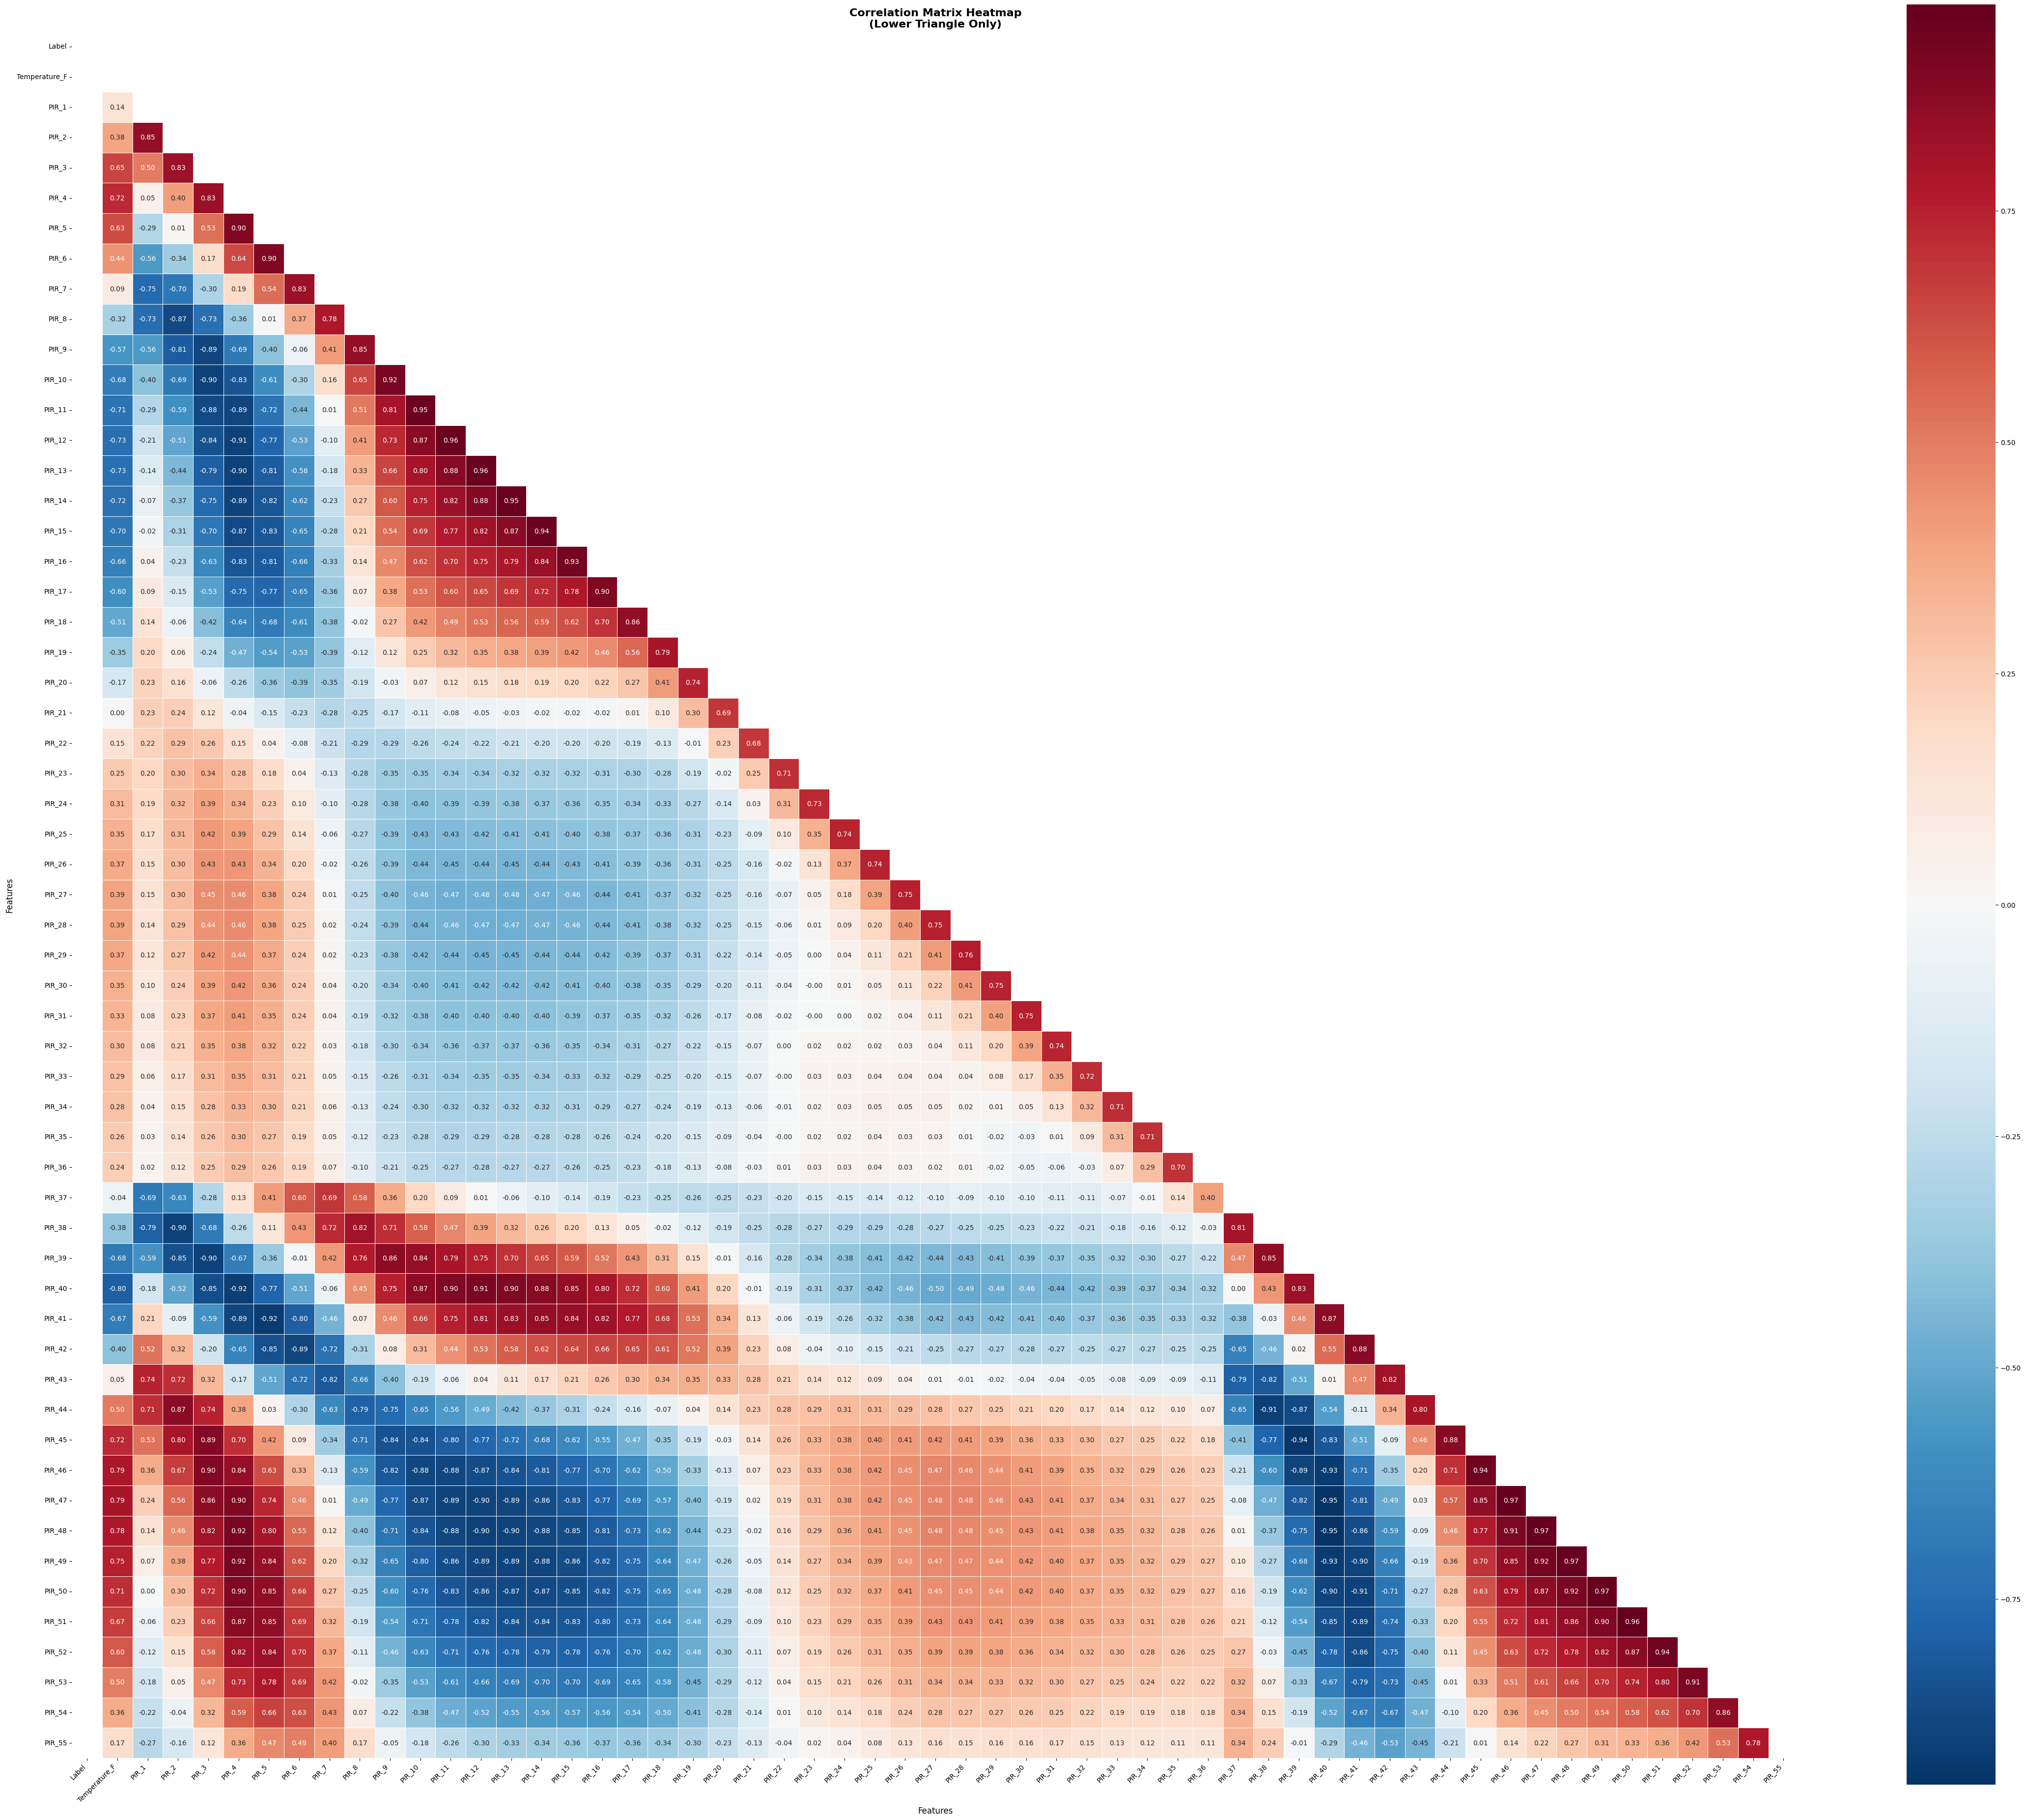

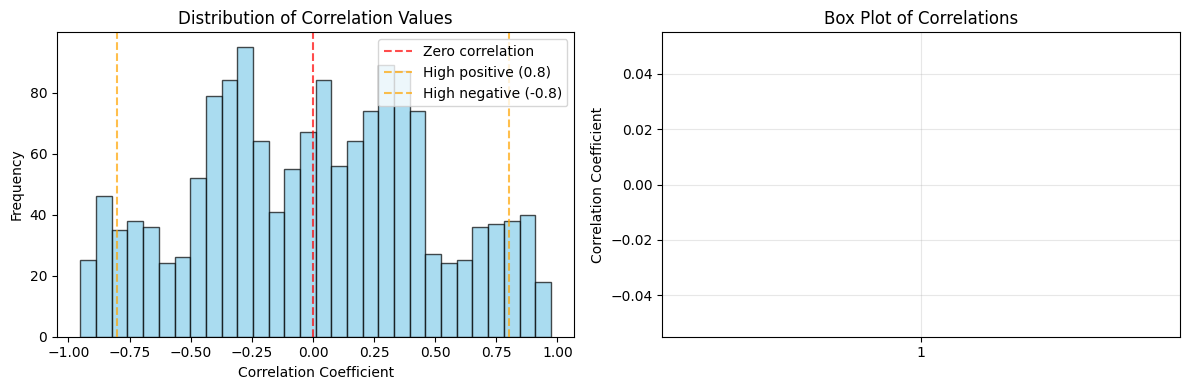


Correlation Statistics:
Mean correlation: nan
Median correlation: nan
Standard deviation: nan
Range: [nan, nan]

HIGH CORRELATION ANALYSIS

Highly correlated feature pairs (|correlation| >= 0.8):
Feature 1 Feature 2  Correlation
   PIR_47    PIR_48     0.972965
   PIR_48    PIR_49     0.972171
   PIR_49    PIR_50     0.968259
   PIR_46    PIR_47     0.966174
   PIR_50    PIR_51     0.959484
   PIR_11    PIR_12     0.956857
   PIR_12    PIR_13     0.955861
   PIR_13    PIR_14     0.953862
   PIR_40    PIR_47    -0.951152
   PIR_10    PIR_11     0.948058
   PIR_40    PIR_48    -0.946397
   PIR_14    PIR_15     0.944043
   PIR_45    PIR_46     0.941853
   PIR_51    PIR_52     0.941770
   PIR_39    PIR_45    -0.940386
   PIR_40    PIR_49    -0.927330
   PIR_40    PIR_46    -0.926729
   PIR_15    PIR_16     0.925890
    PIR_5    PIR_41    -0.923787
   PIR_47    PIR_49     0.922403
    PIR_9    PIR_10     0.919147
    PIR_4    PIR_40    -0.918966
   PIR_48    PIR_50     0.918434
    PIR_4  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
def load_and_explore_data(file_path):
    """Load dataset and provide basic information"""
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        print(f"Shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        print("\nFirst few rows:")
        print(df.head())
        print("\nData types:")
        print(df.dtypes)
        print("\nMissing values:")
        print(df.isnull().sum())
        return df
    except FileNotFoundError:
        print(f"File '{file_path}' not found. Please check the file path.")
        return None
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def prepare_correlation_data(df):
    """Prepare data by selecting only numeric columns and handling missing values"""
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    print(f"\nNumeric columns found: {len(numeric_df.columns)}")
    print(f"Numeric columns: {list(numeric_df.columns)}")

    # Handle missing values
    if numeric_df.isnull().sum().sum() > 0:
        print("\nHandling missing values...")
        numeric_df = numeric_df.fillna(numeric_df.mean())

    return numeric_df

# Calculate correlation matrix
def calculate_correlation_matrix(df):
    """Calculate correlation matrix using Pearson correlation"""
    correlation_matrix = df.corr()
    return correlation_matrix

# Create correlation heatmap
def create_correlation_heatmap(correlation_matrix, figsize=(12, 10)):
    """Create a comprehensive correlation heatmap"""
    plt.figure(figsize=figsize)

    # Create heatmap
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='RdBu_r',
                center=0,
                square=True,
                mask=mask,
                cbar_kws={"shrink": .8},
                fmt='.2f',
                linewidths=0.5)

    plt.title('Correlation Matrix Heatmap\n(Lower Triangle Only)', fontsize=16, fontweight='bold')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Find highly correlated features
def find_highly_correlated_features(correlation_matrix, threshold=0.8):
    """Find pairs of features with correlation above threshold"""
    # Create a copy and set diagonal to 0 (self-correlation)
    corr_matrix = correlation_matrix.copy()
    np.fill_diagonal(corr_matrix.values, 0)

    # Find high correlations
    high_corr_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= threshold:
                high_corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_value
                })

    return pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)

# Analyze correlation distribution
def analyze_correlation_distribution(correlation_matrix):
    """Analyze the distribution of correlation values"""
    # Get upper triangle values (excluding diagonal)
    mask = np.triu(np.ones_like(correlation_matrix), k=1).astype(bool)
    correlations = correlation_matrix.values[mask]

    plt.figure(figsize=(12, 4))

    # Distribution plot
    plt.subplot(1, 2, 1)
    plt.hist(correlations, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Correlation Values')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Frequency')
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Zero correlation')
    plt.axvline(x=0.8, color='orange', linestyle='--', alpha=0.7, label='High positive (0.8)')
    plt.axvline(x=-0.8, color='orange', linestyle='--', alpha=0.7, label='High negative (-0.8)')
    plt.legend()

    # Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(correlations, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7))
    plt.title('Box Plot of Correlations')
    plt.ylabel('Correlation Coefficient')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print statistics
    print(f"\nCorrelation Statistics:")
    print(f"Mean correlation: {np.mean(correlations):.3f}")
    print(f"Median correlation: {np.median(correlations):.3f}")
    print(f"Standard deviation: {np.std(correlations):.3f}")
    print(f"Range: [{np.min(correlations):.3f}, {np.max(correlations):.3f}]")

# Feature selection recommendations
def recommend_feature_selection(correlation_matrix, threshold=0.8):
    """Recommend features to remove based on high correlation"""
    high_corr_df = find_highly_correlated_features(correlation_matrix, threshold)

    if len(high_corr_df) == 0:
        print(f"\nNo feature pairs found with correlation >= {threshold}")
        return []

    # Simple strategy: from each highly correlated pair, recommend removing one
    features_to_remove = set()
    processed_pairs = set()

    for _, row in high_corr_df.iterrows():
        pair = tuple(sorted([row['Feature 1'], row['Feature 2']]))
        if pair not in processed_pairs:
            # Add the second feature to removal list (you might want to use domain knowledge here)
            features_to_remove.add(row['Feature 2'])
            processed_pairs.add(pair)

    print(f"\nRecommended features to remove (based on correlation >= {threshold}):")
    for feature in features_to_remove:
        print(f"- {feature}")

    return list(features_to_remove)

# Main analysis function
def perform_correlation_analysis(file_path, correlation_threshold=0.8):
    """Complete correlation analysis pipeline"""
    print("="*60)
    print("CORRELATION ANALYSIS")
    print("="*60)

    # Load and explore data
    df = load_and_explore_data(file_path)
    if df is None:
        return

    # Prepare data
    numeric_df = prepare_correlation_data(df)
    if len(numeric_df.columns) < 2:
        print("Not enough numeric columns for correlation analysis.")
        return

    # Calculate correlation matrix
    correlation_matrix = calculate_correlation_matrix(numeric_df)

    # Create visualizations
    print("\n" + "="*40)
    print("VISUALIZATIONS")
    print("="*40)

    # Adjust figure size based on number of features
    n_features = len(correlation_matrix.columns)
    figsize = (max(12, n_features * 0.8), max(10, n_features * 0.8))

    create_correlation_heatmap(correlation_matrix, figsize)
    analyze_correlation_distribution(correlation_matrix)

    # Find highly correlated features
    print("\n" + "="*40)
    print("HIGH CORRELATION ANALYSIS")
    print("="*40)

    high_corr_df = find_highly_correlated_features(correlation_matrix, correlation_threshold)

    if len(high_corr_df) > 0:
        print(f"\nHighly correlated feature pairs (|correlation| >= {correlation_threshold}):")
        print(high_corr_df.to_string(index=False))
    else:
        print(f"\nNo feature pairs found with |correlation| >= {correlation_threshold}")

    # Feature selection recommendations
    print("\n" + "="*40)
    print("FEATURE SELECTION RECOMMENDATIONS")
    print("="*40)

    features_to_remove = recommend_feature_selection(correlation_matrix, correlation_threshold)

    if features_to_remove:
        print(f"\nOriginal features: {len(correlation_matrix.columns)}")
        print(f"Features to remove: {len(features_to_remove)}")
        print(f"Remaining features: {len(correlation_matrix.columns) - len(features_to_remove)}")

    return correlation_matrix, high_corr_df, features_to_remove

# Run the analysis
if __name__ == "__main__":
    # File path
    file_path = "pirvision_office_dataset1.csv"

    # Perform correlation analysis
    results = perform_correlation_analysis(file_path, correlation_threshold=0.8)

    if results:
        correlation_matrix, high_corr_pairs, recommended_removals = results
        print("\n" + "="*60)
        print("ANALYSIS COMPLETE!")
        print("="*60)

        # Optional: Save results
        save_results = input("\nDo you want to save the correlation matrix to CSV? (y/n): ")
        if save_results.lower() == 'y':
            correlation_matrix.to_csv('correlation_matrix.csv')
            if len(high_corr_pairs) > 0:
                high_corr_pairs.to_csv('highly_correlated_pairs.csv', index=False)
            print("Results saved successfully!")


## date time Extraction, Scalling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("pirvision_office_dataset1.csv")

# --- 1. Feature Extraction from Date and Time ---
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Extract features
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

# Drop original Date and Time
df.drop(columns=['Date', 'Time'], inplace=True)

# --- 2. Scaling Temperature and PIR columns ---
scaler = StandardScaler()

# Columns to scale: Temperature and PIR_1 to PIR_55
columns_to_scale = ['Temperature_F'] + [col for col in df.columns if col.startswith('PIR_')]

# Apply scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# --- Final dataset is ready ---
print(df.head())


   Label  Temperature_F     PIR_1     PIR_2     PIR_3     PIR_4     PIR_5  \
0      0       0.245676 -0.055875 -0.494950 -0.551045 -0.616061 -0.558023   
1      1       0.245676 -0.055853 -0.180633 -0.333270 -0.513508 -0.663652   
2      0       0.245676 -0.055861 -0.373279 -0.488606 -0.507475 -0.358319   
3      0       0.245676 -0.055899 -0.995152 -1.059694 -0.671862 -0.219681   
4      0       0.245676 -0.055863 -0.586203 -0.630236 -0.519540 -0.231234   

      PIR_6     PIR_7     PIR_8  ...    PIR_50    PIR_51    PIR_52    PIR_53  \
0 -0.230890  0.165129  0.450680  ... -0.572173 -0.483428 -0.355541 -0.314113   
1 -0.484048 -0.277654  0.084387  ... -0.425187 -0.510887 -0.529183 -0.513220   
2 -0.255089 -0.048284  0.160448  ... -0.484681 -0.432172 -0.423068 -0.431114   
3  0.072528  0.414444  0.640832  ... -0.654415 -0.542007 -0.396057 -0.188902   
4  0.035299  0.280811  0.264531  ... -0.629918 -0.525531 -0.318883 -0.318218   

     PIR_54    PIR_55  Hour  Minute  DayOfWeek  Month  


In [ ]:
df.to_csv("pirvision_transformed.csv", index=False)

print("Transformed dataset saved as 'pirvision_transformed.csv'")

Transformed dataset saved as 'pirvision_transformed.csv'


In [ ]:
df = pd.read_csv('pirvision_transformed.csv')

## Feature Selection

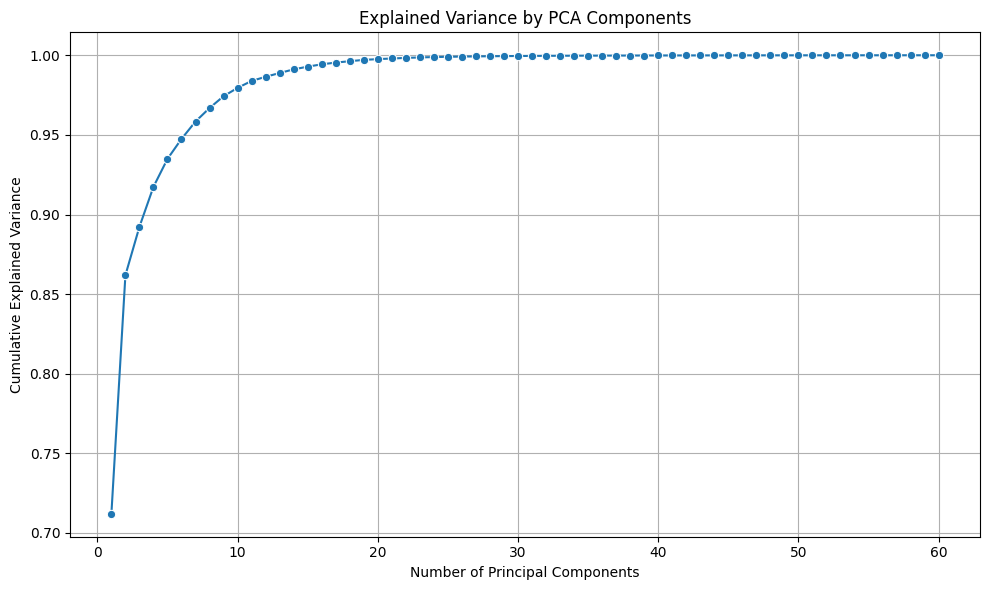

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the transformed dataset
df = pd.read_csv("pirvision_transformed.csv")

# Separate features and target
X = df.drop(columns=["Label"])
y = df["Label"]

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot explained variance
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_) + 1),
             y=pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.tight_layout()
plt.show()


### from plot decide how many components to keep

In [ ]:
# Keep enough components to retain 95% of variance
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

# You can now use X_reduced + y for modeling


## Save X_reduced and y to csv to use in modeling

In [ ]:
import pandas as pd

# Convert PCA output to a DataFrame
df_pca = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(X_reduced.shape[1])])

# Add the target column
df_pca["Label"] = y.values

# Save to CSV
df_pca.to_csv("pirvision_pca_95variance.csv", index=False)

print("✅ PCA-reduced dataset saved as 'pirvision_pca_95variance.csv'")


✅ PCA-reduced dataset saved as 'pirvision_pca_95variance.csv'


In [ ]:
df_pca = pd.read_csv("pirvision_pca_95variance.csv")

# Separate features and target
X_reduced = df_pca.drop(columns=["Label"])
y = df_pca["Label"]


##  Feature-to-Feature Correlation Heatmap (Highly Correlated Pairs Only)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("pirvision_transformed.csv")

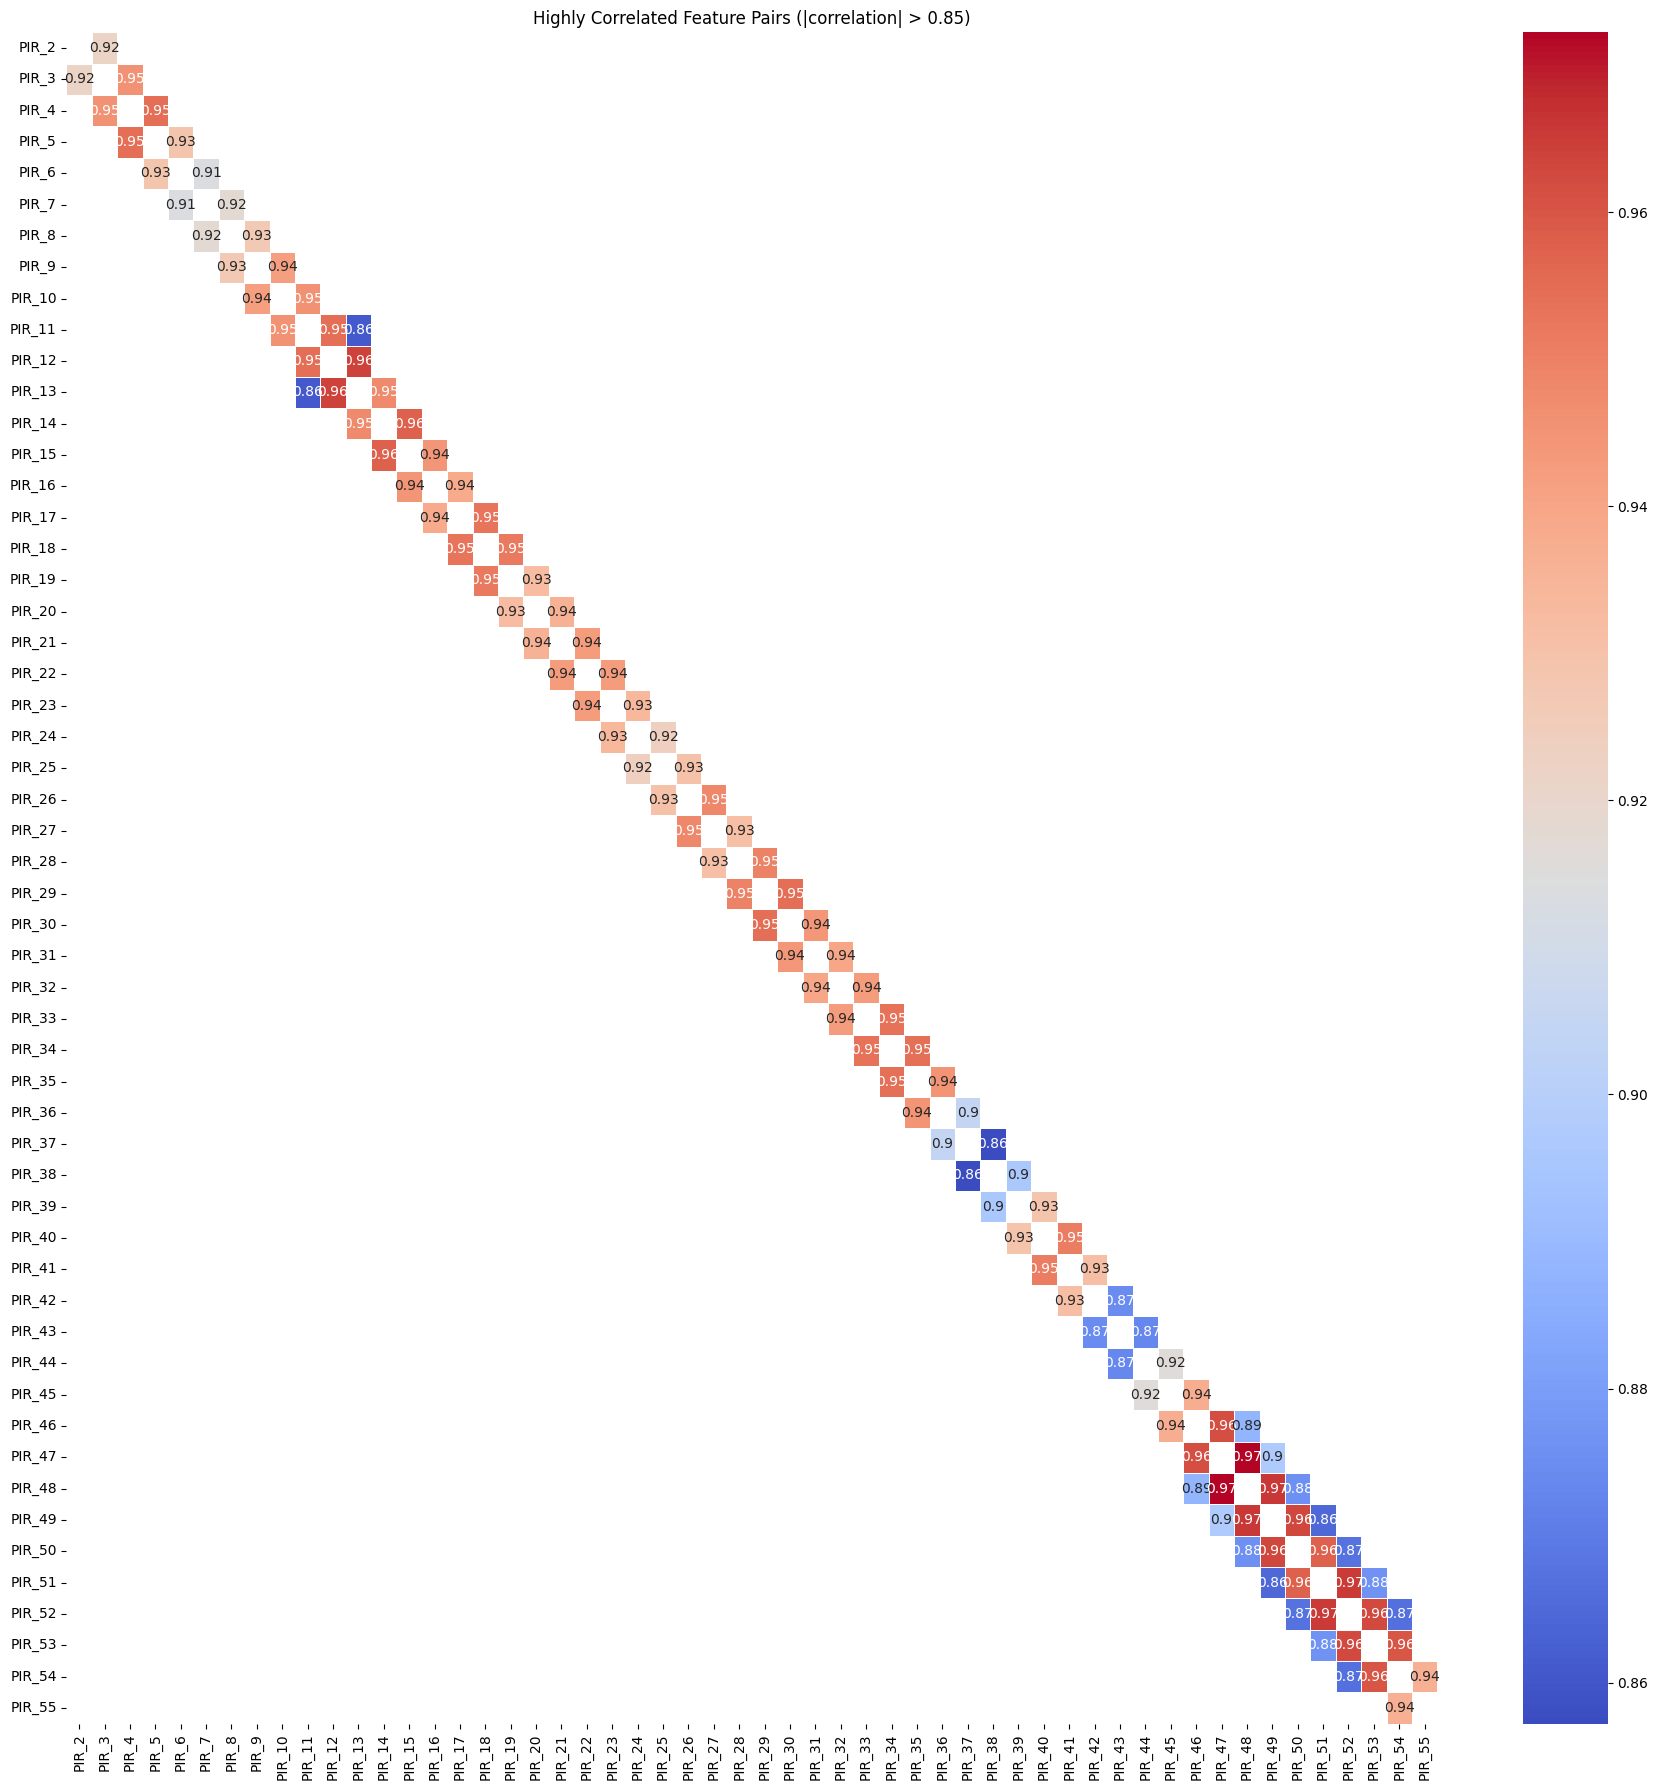

In [ ]:
# Drop the target variable 'Label' (we want feature-to-feature only)
features_only = df.drop('Label', axis=1)

# Compute the correlation matrix (absolute values for strength)
corr_matrix = features_only.corr().abs()

# Filter: keep only feature pairs with correlation > 0.85 (excluding self-correlations)
high_corr = corr_matrix[(corr_matrix >= 0.85) & (corr_matrix < 1.0)]

# Drop rows and columns where all values are NaN (no high correlations)
filtered_corr = high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot the filtered heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Highly Correlated Feature Pairs (|correlation| > 0.85)')
plt.tight_layout()
plt.show()


## trial correlation for PCA data